# **Author: Sri Sudheera Chitipolu**

### *Github: https://github.com/sudheera96*

## Acquire the Data

Collected data from kaggle

*https://www.kaggle.com/hellbuoy/car-price-prediction*

## General Description: 
For understanding pricing dynamics of the new market in the different cars for business growth, we will predict the car’s prices depending on different independent variables. 

## Importing the dataset

In [1]:
import pandas as pd # imported pandas as pd
cp_data = pd.read_csv("carPrice_Assignment.csv") # pulled data from csv file to pandas dataframe
print(cp_data.keys()) # display a list of the names of the fields
cp_data.head(10) # table display of the first few lines in the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## _Notes_
In inital_exploration we have seen there are features with negative correlated with target variable. So we are droping them from data set

In [2]:
df = cp_data.drop(columns=["car_ID","CarName","highwaympg","citympg","peakrpm","symboling"])

In [3]:
df_obj_cols = df.select_dtypes(include = 'object')
df_num_cols = df.select_dtypes(exclude = 'object')
# make object columns to numerical columns using get_dummies
df_obj_dummies = pd.get_dummies(df_obj_cols,drop_first=True)
df_obj_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## _Notes_

Created dummy variables for categorical without it with column in every respective dummy variable inorder to avoid multicollinarity.

In [4]:
final_cardf = pd.concat([df_num_cols, df_obj_dummies], axis=1)
final_cardf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


## _Notes_
Similary removed other features which are having negative correlation with price. For more details look at the initial exploration

In [5]:
final_cardf = final_cardf.drop(columns=["cylindernumber_four","drivewheel_fwd","fuelsystem_2bbl","enginetype_ohc",
                                        "carbody_hatchback",
                                        "fueltype_gas","cylindernumber_three","fuelsystem_spdi",
                                        "carbody_wagon","doornumber_two","fuelsystem_spfi","fuelsystem_4bbl",
                                        "enginetype_rotor","cylindernumber_two","fuelsystem_mfi"])

## Importing linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

## Splitting the dataset to train set and test set.

Test set using as cross validation

In [7]:
from sklearn.model_selection import train_test_split
X = final_cardf.drop('price',1)
x_train, x_cv, y_train, y_cv = train_test_split(X,final_cardf.price, test_size =0.3)

## Training a linear regression model on train

In [8]:
lreg.fit(x_train,y_train)

LinearRegression()

## Prediction on cv

In [9]:
pred_cv = lreg.predict(x_cv)

## Model Evaluation: 1. Root mean square error

In [10]:
import numpy as np
mse = np.mean((pred_cv - y_cv)**2)

In [11]:
mse

9315344.304994462

## 2. r-square

In [12]:
lreg.score(x_cv,y_cv)

0.8523879023571467

## _Notes_
we can see that there is a good value in both mse and R-square, which means that our model now is able to predict much closer values to the actual values. Also our R square is 85% meaning 85% variance of prices is explained by all the independent variables we have choosen. 

In [13]:
from pandas import Series, DataFrame
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,wheelbase,94.455421
1,carlength,-59.032819
2,carwidth,650.903616
3,carheight,44.137246
4,curbweight,4.184369
5,enginesize,119.717933
6,boreratio,-6227.492168
7,stroke,-5433.443011
8,compressionratio,-277.000326
9,horsepower,41.631102


## _Notes_
Therefore, we can see that there are few features with a high coefficient, meaning features having higher coeffiecients  have better prices.

## Magnitude of coefficients

<AxesSubplot:title={'center':'Modal Coefficients'}>

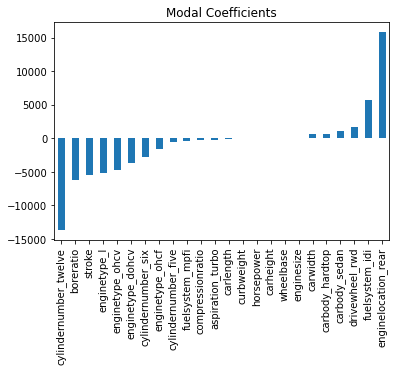

In [14]:
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## _Notes_

enginelocation_rear having highest coeffiect magnitude because of it we can say that our prices of car will be more by this feature. We use other regressions to overcome this problem.

## Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.75, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

## calculating mse

mse = np.mean((pred - y_cv)**2)
mse


10980396.732009832

In [16]:
## calculating score 
ridgeReg.score(x_cv,y_cv)

0.8260032757250118

<AxesSubplot:title={'center':'Modal Coefficients'}>

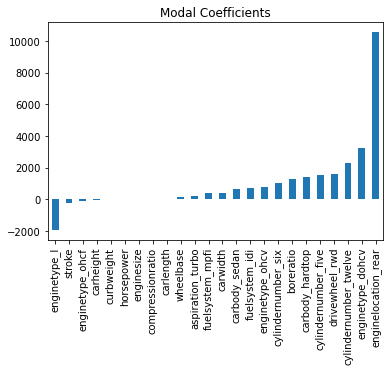

In [17]:
predictors = x_train.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [18]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

## calculating mse

mse = np.mean((pred - y_cv)**2)
mse

11657005.506437894

In [19]:
## calculating score 
ridgeReg.score(x_cv,y_cv)

0.8152816494268472

<AxesSubplot:title={'center':'Modal Coefficients'}>

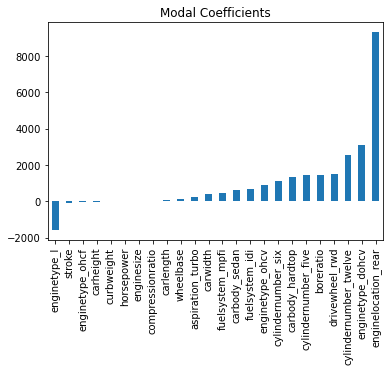

In [20]:
predictors = x_train.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## _Notes_

If we increase the alpha value greater than 0.75 our magnitude of coeefiecients are reaching to zero also R sqaure is decreases which is not a good sight.so we fix for ridged resgression alpha value as 0.75

## Lasso regression

In [21]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred - y_cv)**2)

mse

8805205.115594994

In [22]:
lassoReg.score(x_cv,y_cv)

0.8604716310279921

## _Notes_

There is decrease in mse and increase r square value so it might be good model to use.  

<AxesSubplot:title={'center':'Modal Coefficients'}>

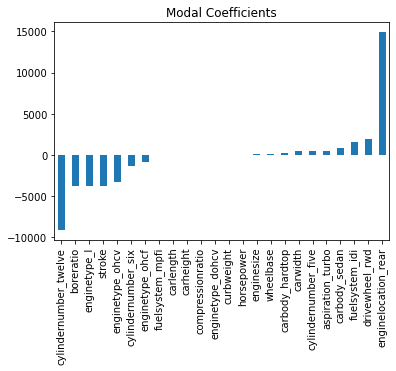

In [23]:
predictors = x_train.columns
coef = Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## _Notes_

So as we increase alpha value few features coeffecients are going to zero which means it selecting few features as a feature selection so in ridge regression also we observed little bit in same manner but in lasso R square is increasing.


## Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse 

14575788.498455022

In [25]:
ENreg.score(x_cv,y_cv)

0.7690302532455026

<AxesSubplot:title={'center':'Modal Coefficients'}>

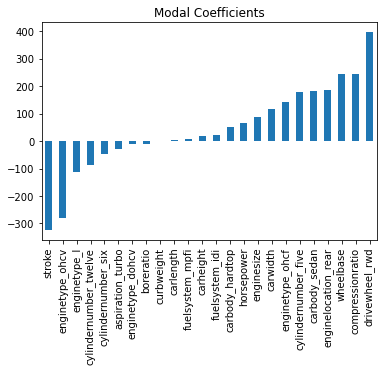

In [26]:
predictors = x_train.columns
coef = Series(ENreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## _Notes_

Elestic net regression is working very well because mse value is decreased a lot and also R sqaure value decreased and feature coefficient values also performed good way rather than focusing only one one feature now most of the features of dataset are important.